In [7]:
%%html
<link rel="stylesheet" type="text/css" href="custom.css">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dead = 0
alive = 1

In [3]:
def update_each_unit(cell, neighbors):
    neighbors = np.sum(neighbors) - cell
    
    if cell == alive:
        # Underpopulation
        if neighbors < 2: 
            return dead
        
        # Next Generation
        if neighbors in [2, 3]: 
            return alive
        
        # Overpopulation
        if neighbors > 3: 
            return dead
    else:
        # Reproduction
        if neighbors == 3: 
            return alive
    return cell

In [4]:
def update_grid(grid):
    # Creating a padded grid to handle edge cells
    bigger_grid = np.pad(grid, pad_width=1)

    # Creating an array of zeros with the same shape as the original grid
    other_generated_grid = np.zeros_like(grid)

    # Iterates over the rows excluding the first and last rows
    for row in range(1, bigger_grid.shape[0] - 1):
        # Iterates over the columns excluding the first and last columns
        for column in range(1, bigger_grid.shape[1] - 1):

            # Extracting the 3x3 neighborhood
            nearby_cells = bigger_grid[row-1:row+2, column-1:column+2]

            # Assigns the updated state of the cell in focus at the specified row and column
            # and determines the next state of the cell in focus based on the surrounding cells
            other_generated_grid[row-1, column-1] = update_each_unit(bigger_grid[row, column], nearby_cells)
 
    return other_generated_grid

In [5]:
initial_grid = np.array([
    [dead, dead, alive],
    [dead, alive, alive],
    [alive, alive, dead]
    ])

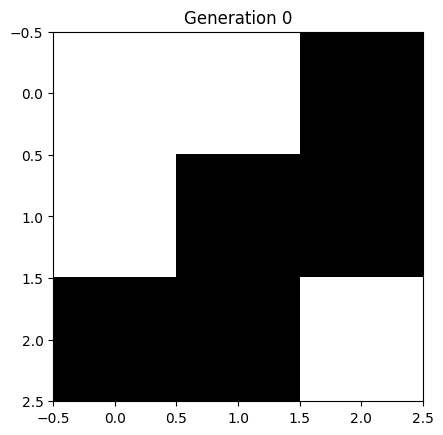

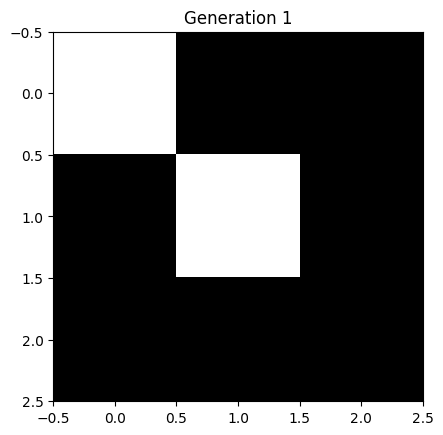

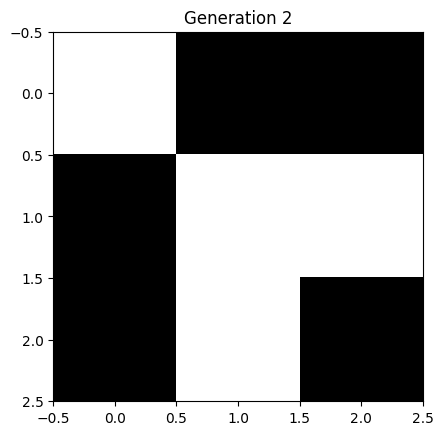

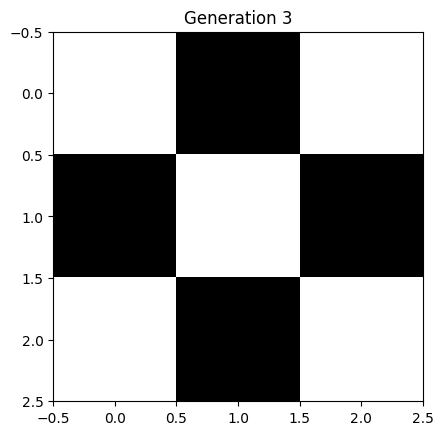

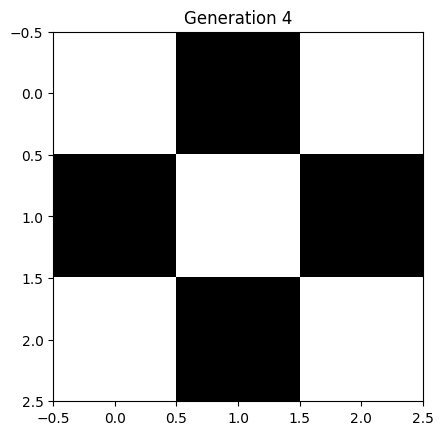

In [6]:
# Function to display the grid
def display_grid(grid, generation):
    plt.imshow(grid, cmap='binary')
    plt.title(f'Generation {generation}')
    plt.show()

# Update and display the grid for a few generations
new_grid = initial_grid
generations = 5  # Number of generations to display

for generation in range(generations):
    display_grid(new_grid, generation)
    new_grid = update_grid(new_grid)